In [3]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from tensorflow.keras.models import model_from_json

import os
import joblib
import pickle
import json

import time
import warnings
warnings.filterwarnings(action = 'once')

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import stability as st

import statistics
import scipy as scp
import math

import lime
from lime import lime_tabular

import shap

In [4]:
PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/Diabetes/"
#PATH = "C:/Users/velmurug/Documents/Stability Experiments/Diabetes/"
model_filename = os.path.join(PATH, "models/model_h5_N12_DUO.json")
weights_filename = os.path.join(PATH, "models/model_h5_N12_DUO.h5")
dataset_path = 'datasets/'

json_file = open(model_filename, 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(weights_filename)
print("Loaded model from disk")

Loaded model from disk


In [5]:
tp_file = os.path.join(PATH, "datasets/dicts/nn_true_pos.pkl")
with open (tp_file, 'rb') as f:
    results = pickle.load(f)
    
f.close()

In [6]:
X_train = pd.read_csv(PATH + "datasets/diabetes_Xtrain.csv", index_col=False).values
X_test = pd.read_csv(PATH + "datasets/diabetes_Xtest.csv", index_col=False).values
X_validation =pd.read_csv(PATH + "datasets/diabetes_Xvalidation.csv",index_col=False).values
y_train = pd.read_csv(PATH + "datasets/diabetes_Ytrain.csv",index_col=False).values
y_test =pd.read_csv(PATH + "datasets/diabetes_Ytest.csv", index_col=False).values
y_validation = pd.read_csv(PATH + "datasets/diabetes_Yvalidation.csv", index_col=False).values

original_data = pd.read_csv(PATH + "datasets/diabetes.csv")
feature_names = original_data.drop(["Outcome"], axis = 1).columns

In [7]:
MAX_FEAT = 5

start_time = time.time()

# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names, 
                                                  class_names=["No Diabetes", "Diabetes"], verbose=False, mode='classification')

elapsed = time.time() - start_time

print ("Time taken to create explainer:", round(elapsed, 2), "seconds")

Time taken to create explainer: 0.0 seconds


In [8]:
stability_scores = []
probas = []

feat_list = list(feature_names)

for instance in results:
    print ("Running instance", results.index(instance))
    
    feat_pres = []

    print("INDEX = %d" %instance['index'])
    patients_feat = np.array(instance['scaled_vector'])
    prediction = instance['predictions']
    probas.append(instance['prediction_probability'][1])
    
    start_time = time.time()
    # explain instance
    
    for iteration in range(100):
        print("Run", iteration)
        lime_exp = explainer.explain_instance(patients_feat, model.predict_proba, num_features = 30)
        
        #For stability by index
        presence_list = [0]*len(feat_list)
    
        for each in feat_list:
            list_idx = feat_list.index(each)
            #print ("Feature", list_idx)
            for explanation in lime_exp.as_list(prediction):
                if each in explanation[0]:
                    if lime_exp.as_list(prediction).index(explanation) < MAX_FEAT:
                        presence_list[list_idx] = 1
                        
        feat_pres.append(presence_list)
        
        #method 1 - Nogueira, Sechidis, Brown.
    stability = st.getStability(feat_pres[:10])
    print ("Stability:", round(stability,2))
    stability_scores.append(stability)
 
    print("\n--------------------------------------------------------------------------------------------\n")

Running instance 0
INDEX = 72
Run 0
Instructions for updating:
Please use `model.predict()` instead.


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.73

--------------------------------------------------------------------------------------------

Running instance 1
INDEX = 75
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.68

--------------------------------------------------------------------------------------------

Running instance 2
INDEX = 19
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.59

--------------------------------------------------------------------------------------------

Running instance 3
INDEX = 39
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.54

--------------------------------------------------------------------------------------------

Running instance 4
INDEX = 35
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 5
INDEX = 74
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.8

--------------------------------------------------------------------------------------------

Running instance 6
INDEX = 71
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.7

--------------------------------------------------------------------------------------------

Running instance 7
INDEX = 44
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.68

--------------------------------------------------------------------------------------------

Running instance 8
INDEX = 52
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.49

--------------------------------------------------------------------------------------------

Running instance 9
INDEX = 78
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.62

--------------------------------------------------------------------------------------------

Running instance 10
INDEX = 31
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 11
INDEX = 20
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.89

--------------------------------------------------------------------------------------------

Running instance 12
INDEX = 67
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.63

--------------------------------------------------------------------------------------------

Running instance 13
INDEX = 14
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.72

--------------------------------------------------------------------------------------------

Running instance 14
INDEX = 41
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.8

--------------------------------------------------------------------------------------------

Running instance 15
INDEX = 79
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.89

--------------------------------------------------------------------------------------------

Running instance 16
INDEX = 53
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 17
INDEX = 45
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.72

--------------------------------------------------------------------------------------------

Running instance 18
INDEX = 37
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 19
INDEX = 50
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 20
INDEX = 10
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.66

--------------------------------------------------------------------------------------------

Running instance 21
INDEX = 7
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.75

--------------------------------------------------------------------------------------------

Running instance 22
INDEX = 42
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.62

--------------------------------------------------------------------------------------------

Running instance 23
INDEX = 62
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 24
INDEX = 54
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.8

--------------------------------------------------------------------------------------------

Running instance 25
INDEX = 32
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.81

--------------------------------------------------------------------------------------------

Running instance 26
INDEX = 3
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.56

--------------------------------------------------------------------------------------------

Running instance 27
INDEX = 63
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.75

--------------------------------------------------------------------------------------------

Running instance 28
INDEX = 65
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.89

--------------------------------------------------------------------------------------------

Running instance 29
INDEX = 1
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 30
INDEX = 68
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.66

--------------------------------------------------------------------------------------------

Running instance 31
INDEX = 47
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 0.62

--------------------------------------------------------------------------------------------

Running instance 32
INDEX = 61
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99


tostring() is deprecated. Use tobytes() instead.


Stability: 1.0

--------------------------------------------------------------------------------------------

Running instance 33
INDEX = 0
Run 0


tostring() is deprecated. Use tobytes() instead.


Run 1


tostring() is deprecated. Use tobytes() instead.


Run 2


tostring() is deprecated. Use tobytes() instead.


Run 3


tostring() is deprecated. Use tobytes() instead.


Run 4


tostring() is deprecated. Use tobytes() instead.


Run 5


tostring() is deprecated. Use tobytes() instead.


Run 6


tostring() is deprecated. Use tobytes() instead.


Run 7


tostring() is deprecated. Use tobytes() instead.


Run 8


tostring() is deprecated. Use tobytes() instead.


Run 9


tostring() is deprecated. Use tobytes() instead.


Run 10


tostring() is deprecated. Use tobytes() instead.


Run 11


tostring() is deprecated. Use tobytes() instead.


Run 12


tostring() is deprecated. Use tobytes() instead.


Run 13


tostring() is deprecated. Use tobytes() instead.


Run 14


tostring() is deprecated. Use tobytes() instead.


Run 15


tostring() is deprecated. Use tobytes() instead.


Run 16


tostring() is deprecated. Use tobytes() instead.


Run 17


tostring() is deprecated. Use tobytes() instead.


Run 18


tostring() is deprecated. Use tobytes() instead.


Run 19


tostring() is deprecated. Use tobytes() instead.


Run 20


tostring() is deprecated. Use tobytes() instead.


Run 21


tostring() is deprecated. Use tobytes() instead.


Run 22


tostring() is deprecated. Use tobytes() instead.


Run 23


tostring() is deprecated. Use tobytes() instead.


Run 24


tostring() is deprecated. Use tobytes() instead.


Run 25


tostring() is deprecated. Use tobytes() instead.


Run 26


tostring() is deprecated. Use tobytes() instead.


Run 27


tostring() is deprecated. Use tobytes() instead.


Run 28


tostring() is deprecated. Use tobytes() instead.


Run 29


tostring() is deprecated. Use tobytes() instead.


Run 30


tostring() is deprecated. Use tobytes() instead.


Run 31


tostring() is deprecated. Use tobytes() instead.


Run 32


tostring() is deprecated. Use tobytes() instead.


Run 33


tostring() is deprecated. Use tobytes() instead.


Run 34


tostring() is deprecated. Use tobytes() instead.


Run 35


tostring() is deprecated. Use tobytes() instead.


Run 36


tostring() is deprecated. Use tobytes() instead.


Run 37


tostring() is deprecated. Use tobytes() instead.


Run 38


tostring() is deprecated. Use tobytes() instead.


Run 39


tostring() is deprecated. Use tobytes() instead.


Run 40


tostring() is deprecated. Use tobytes() instead.


Run 41


tostring() is deprecated. Use tobytes() instead.


Run 42


tostring() is deprecated. Use tobytes() instead.


Run 43


tostring() is deprecated. Use tobytes() instead.


Run 44


tostring() is deprecated. Use tobytes() instead.


Run 45


tostring() is deprecated. Use tobytes() instead.


Run 46


tostring() is deprecated. Use tobytes() instead.


Run 47


tostring() is deprecated. Use tobytes() instead.


Run 48


tostring() is deprecated. Use tobytes() instead.


Run 49


tostring() is deprecated. Use tobytes() instead.


Run 50


tostring() is deprecated. Use tobytes() instead.


Run 51


tostring() is deprecated. Use tobytes() instead.


Run 52


tostring() is deprecated. Use tobytes() instead.


Run 53


tostring() is deprecated. Use tobytes() instead.


Run 54


tostring() is deprecated. Use tobytes() instead.


Run 55


tostring() is deprecated. Use tobytes() instead.


Run 56


tostring() is deprecated. Use tobytes() instead.


Run 57


tostring() is deprecated. Use tobytes() instead.


Run 58


tostring() is deprecated. Use tobytes() instead.


Run 59


tostring() is deprecated. Use tobytes() instead.


Run 60


tostring() is deprecated. Use tobytes() instead.


Run 61


tostring() is deprecated. Use tobytes() instead.


Run 62


tostring() is deprecated. Use tobytes() instead.


Run 63


tostring() is deprecated. Use tobytes() instead.


Run 64


tostring() is deprecated. Use tobytes() instead.


Run 65


tostring() is deprecated. Use tobytes() instead.


Run 66


tostring() is deprecated. Use tobytes() instead.


Run 67


tostring() is deprecated. Use tobytes() instead.


Run 68


tostring() is deprecated. Use tobytes() instead.


Run 69


tostring() is deprecated. Use tobytes() instead.


Run 70


tostring() is deprecated. Use tobytes() instead.


Run 71


tostring() is deprecated. Use tobytes() instead.


Run 72


tostring() is deprecated. Use tobytes() instead.


Run 73


tostring() is deprecated. Use tobytes() instead.


Run 74


tostring() is deprecated. Use tobytes() instead.


Run 75


tostring() is deprecated. Use tobytes() instead.


Run 76


tostring() is deprecated. Use tobytes() instead.


Run 77


tostring() is deprecated. Use tobytes() instead.


Run 78


tostring() is deprecated. Use tobytes() instead.


Run 79


tostring() is deprecated. Use tobytes() instead.


Run 80


tostring() is deprecated. Use tobytes() instead.


Run 81


tostring() is deprecated. Use tobytes() instead.


Run 82


tostring() is deprecated. Use tobytes() instead.


Run 83


tostring() is deprecated. Use tobytes() instead.


Run 84


tostring() is deprecated. Use tobytes() instead.


Run 85


tostring() is deprecated. Use tobytes() instead.


Run 86


tostring() is deprecated. Use tobytes() instead.


Run 87


tostring() is deprecated. Use tobytes() instead.


Run 88


tostring() is deprecated. Use tobytes() instead.


Run 89


tostring() is deprecated. Use tobytes() instead.


Run 90


tostring() is deprecated. Use tobytes() instead.


Run 91


tostring() is deprecated. Use tobytes() instead.


Run 92


tostring() is deprecated. Use tobytes() instead.


Run 93


tostring() is deprecated. Use tobytes() instead.


Run 94


tostring() is deprecated. Use tobytes() instead.


Run 95


tostring() is deprecated. Use tobytes() instead.


Run 96


tostring() is deprecated. Use tobytes() instead.


Run 97


tostring() is deprecated. Use tobytes() instead.


Run 98


tostring() is deprecated. Use tobytes() instead.


Run 99
Stability: 0.8

--------------------------------------------------------------------------------------------



tostring() is deprecated. Use tobytes() instead.


# SHAP

In [9]:
X_train_frame = pd.DataFrame(data = X_train, columns = feature_names)
X_test_frame = pd.DataFrame(data = X_test, columns = feature_names)

data_sample = shap.kmeans(X_train_frame, 100)
shap_explainer = shap.KernelExplainer(model.predict, data_sample)#, link = 'identity')

shap.initjs()

tostring() is deprecated. Use tobytes() instead.


In [12]:
def create_samples(iterations, row, features, top = 10):
    length = len(features)
    
    exp = []
    rel_exp = []
    
    for j in range(iterations):
        #print(X_test_frame.loc[row])
        shap_values = shap_explainer.shap_values(row)
       # print(shap_values)

        importances = []

        for i in range(length):
            #print(i)
            feat = features[i]
            shap_val = shap_values[0][0][i]
            abs_val = abs(shap_values[0][0][i])
            entry = (feat, shap_val, abs_val)
            importances.append(entry)
            #print(entry)

        importances.sort(key=lambda tup: tup[2], reverse = True)
        
        exp.append(importances)

        rel_feat = []

        for i in range(top):
            feat = importances[i]
            if feat[2] > 0:
                rel_feat.append(feat)
                
        rel_exp.append(rel_feat)
        
    return exp, rel_exp

In [14]:
shap_stability_scores = []
probas = []

for instance in results:
    
    print("INDEX = %d" %instance['index'])
    patients_feat = pd.Series(instance['scaled_vector'])
    prediction = instance['predictions']
    probas.append(instance['prediction_probability'][1])
    
    loc = results.index(instance)
    
    exp, rel_exp = create_samples(50, patients_feat.values.reshape(-1, 8), feature_names, top = 5)
    
    #print(rel_exp)
    
    feat_pres = []
    
    for iteration in rel_exp:
        print("Iteration", rel_exp.index(iteration))
        #print(iteration)

        #Stability by index
        presence_list = [0]*len(feat_list)
        
        for each in feat_list:
            list_idx = feat_list.index(each)
            #print ("Feature", list_idx)
            for explanation in iteration:
                if each in explanation[0]:
                    #by index
                    presence_list[list_idx] = 1
                    
        feat_pres.append(presence_list)
        
    stability = st.getStability(feat_pres)
    print ("Stability:", round(stability,2))
    shap_stability_scores.append(stability)

INDEX = 72



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 75



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 19



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 39



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 35



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 74



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 71



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 44



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 52



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 78



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 31



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 20



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 67



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 14



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 41



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 79



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 53



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 45



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 37



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 50



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 10



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 7



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 42



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 62



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 54



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 32



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 3



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 63



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 65



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 1



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 68



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 47



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 61



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0
INDEX = 0



Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Iteration 0
Stability: 1.0


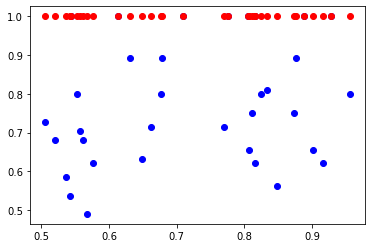

In [15]:
plt.plot(probas, stability_scores, 'bo', label = 'LIME')
plt.plot(probas, shap_stability_scores, 'ro', label = 'SHAP')
plt.show()